In [7]:
import pandas as pd
from pathlib import Path
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import src.utils as utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import src.data_processing.data as data

In [74]:
## loop through all train rides, count all the train rides with the same value for hour 'i' and for day 'j': in this way we can see the number of train rides per hour for e.g. the hour of 14 and day 20/9/2020. The y value we need is then the average delay time for that hour
x_values = []
y_values = []
for j in range(20, 27):
    for i in range(24):
        x_values.append(data.full_trips[(data.full_trips['Time of planned arrival'].dt.hour == i) & (data.full_trips['Date of real arrival'].dt.day == j)].shape[0])
        y_values.append(data.full_trips[(data.full_trips['Time of planned arrival'].dt.hour == i) & (data.full_trips['Date of real arrival'].dt.day == j)]['Delay time'].mean())

In [75]:
## pair the x and y values
pairs = pd.DataFrame(list(zip(x_values, y_values)), columns=['X', 'Y'])
pairs

,X,Y
0,66,6078.413793
1,26,49.916667
2,0,NaN
3,0,NaN
4,26,73.850000
...,...,...
163,2256,98.502158
164,2172,104.319747
165,2082,111.600310
166,1683,128.198058


In [76]:
## drop NaN values, since there is no delay time possible for these rows: there were no train rides during that hour (mostly between 02:00-03:00 and 03:00-04:00, then sort it to see if and how much times there is an equal number of train rides per hour
pairs = pairs.dropna()
pairs = pairs.sort_values(by = "X")
pairs


,X,Y
26,2,71.000000
148,23,45.700000
1,26,49.916667
4,26,73.850000
97,36,151.650000
...,...,...
31,4771,200.393074
79,4807,207.753077
55,4813,201.270373
127,4819,179.798818


In [77]:
## take the mean for the y values if there are cells with the same number of train rides per hour
new_pairs = pairs.groupby('X').agg({'X' : 'first', 'Y' : 'mean'})
new_pairs

,X,Y
X,,
2,2,71.000000
23,23,45.700000
26,26,61.883333
36,36,151.650000
37,37,399.200000
...,...,...
4771,4771,200.393074
4807,4807,207.753077
4813,4813,201.270373


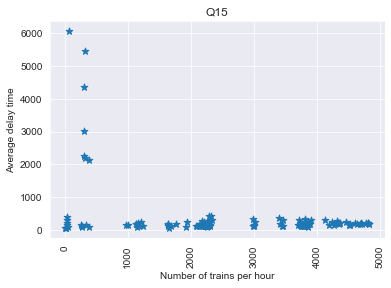

In [90]:
plt.figure(facecolor="white")
plt.scatter(new_pairs['X'], new_pairs['Y'], marker = "*", s=50)
plt.title("Q15")
plt.xlabel("Number of trains per hour")
plt.ylabel("Average delay time")
plt.xticks(rotation= "vertical")
plt.show()

In [ ]:
## We see that the biggest delays were mostly when there were few train rides per hour: This is due to the fact that when there are few train rides per hour, it is because multiple train rides were cancelled (due to a strike e.g.). The trains that did ride that hour were then most likely to experience delays.
## On top of that, we see a small trend of increased average delay time when there are more train rides per hour.